In [1]:
import pandas as pd
all_muts_df = pd.read_pickle("../data/4_10_with_uniq_midpts.pkl")
display(len(all_muts_df), all_muts_df.head())

3921

,index,exp,ale,flask,isolate,tech_rep,presence,Position,Mutation Type,Sequence Change,...,temperature,carbon-source,supplement,strain-description,taxonomy-id,base-media,nitrogen-source,phosphorous-source,sulfur-source,calcium-source
0,9,42C,1,124,1,1,1.0,702352,DEL,Δ21 bp,...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
1,10,42C,1,124,1,1,1.0,1308318,SNP,G→C,...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
2,11,42C,1,124,1,1,1.0,3815859,DEL,Δ82 bp,...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
3,12,42C,1,124,1,1,1.0,4187550,SNP,C→T,...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)
4,13,42C,1,124,1,1,1.0,4400313,SNP,A→C,...,42 celsius,glucose(4),NaCl(0.5g/L) trace elements,WT,511145,M9,NH4Cl(1),KH2PO4(3) Na2HPO4(6.8),MgSO4(0.24),CaCl2(0.1)


In [7]:
muts_df = pd.DataFrame()
FEAT_TYPES = ["genomic features", "operons", "pathways", "regulators"]  # ignoring genetic features for now since the genes get double with genomic features

for _, m in all_muts_df.iterrows():
    mut_assoc = False
    for ft in FEAT_TYPES:
        for f in m[ft]:
            if "glycerol(2.5)" in f["significantly associated conditions"]:
                mut_assoc = True
                break
        if mut_assoc:
            break
    
    if mut_assoc:
        muts_df = muts_df.append(m)

display(len(muts_df),muts_df.head())

149

,COG links,COGs,Details,EC number links,EC numbers,Mutation Type,Position,RBS,Reference Seq,Sequence Change,...,regulators,sample,sample type,strain-description,sulfur-source,supplement,taxonomy-id,tech_rep,temperature,terminator
185,{'General function prediction only': ['ECK1200...,[{'name': 'General function prediction only'}],T247M (ACG→ATG),{},[],SNP,231861.0,{},NC_000913,C→T,...,[],1 280 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{}
186,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],R665S (CGT→AGT),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",SNP,3993145.0,{},NC_000913,C→A,...,"[{'name': 'CRP', 'significantly associated con...",1 280 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{}
187,{'Energy production and conversion': ['ECK1200...,[{'name': 'Energy production and conversion'}],S59Y (TCC→TAC),{'2.7.1.30': ['ECK120014723']},"[{'name': '2.7.1.30', 'significantly associate...",SNP,4117047.0,{},NC_000913,G→T,...,"[{'name': 'GlpR', 'significantly associated co...",1 280 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{}
188,{'Amino acid transport and metabolism': ['ECK1...,[{'name': 'Amino acid transport and metabolism'}],T593P (ACC→CCC),"{'1.1.1.3': ['ECK120015057', 'ECK120015057', '...","[{'name': '1.1.1.3', 'significantly associated...",SNP,4131611.0,{},NC_000913,A→C,...,"[{'name': 'HypT', 'significantly associated co...",1 280 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{}
189,{'Transcription': ['ECK120016992']},[{'name': 'Transcription'}],E641K (GAA→AAA),"{'2.7.7.6': ['ECK120016992', 'ECK120016992']}","[{'name': '2.7.7.6', 'significantly associated...",SNP,4183165.0,{},NC_000913,G→A,...,[],1 280 0 1,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{}


In [8]:
muts_df["sample"] = muts_df.apply(lambda r:
                                  r.exp
                                  + ' ' + str(int(r["ale"]))
                                  + ' ' + str(int(r["flask"]))
                                  + ' ' + str(int(r["isolate"]))
#                                   + ' ' + str(r["tech_rep"])  # commented these out since the mutations that are represented are those with highest freq across sample replications from the same flask, therefore there shouldn't be any mutation overlap between the sample replicates from the same flask.
                                          , axis=1
                                 )
muts_df.head()

,COG links,COGs,Details,EC number links,EC numbers,Mutation Type,Position,RBS,Reference Seq,Sequence Change,...,regulators,sample,sample type,strain-description,sulfur-source,supplement,taxonomy-id,tech_rep,temperature,terminator
185,{'General function prediction only': ['ECK1200...,[{'name': 'General function prediction only'}],T247M (ACG→ATG),{},[],SNP,231861.0,{},NC_000913,C→T,...,[],GYD 1 280 0,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{}
186,{'Nucleotide transport and metabolism': ['ECK1...,[{'name': 'Nucleotide transport and metabolism'}],R665S (CGT→AGT),{'4.6.1.1': ['ECK120014835']},"[{'name': '4.6.1.1', 'significantly associated...",SNP,3993145.0,{},NC_000913,C→A,...,"[{'name': 'CRP', 'significantly associated con...",GYD 1 280 0,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{}
187,{'Energy production and conversion': ['ECK1200...,[{'name': 'Energy production and conversion'}],S59Y (TCC→TAC),{'2.7.1.30': ['ECK120014723']},"[{'name': '2.7.1.30', 'significantly associate...",SNP,4117047.0,{},NC_000913,G→T,...,"[{'name': 'GlpR', 'significantly associated co...",GYD 1 280 0,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{}
188,{'Amino acid transport and metabolism': ['ECK1...,[{'name': 'Amino acid transport and metabolism'}],T593P (ACC→CCC),"{'1.1.1.3': ['ECK120015057', 'ECK120015057', '...","[{'name': '1.1.1.3', 'significantly associated...",SNP,4131611.0,{},NC_000913,A→C,...,"[{'name': 'HypT', 'significantly associated co...",GYD 1 280 0,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{}
189,{'Transcription': ['ECK120016992']},[{'name': 'Transcription'}],E641K (GAA→AAA),"{'2.7.7.6': ['ECK120016992', 'ECK120016992']}","[{'name': '2.7.7.6', 'significantly associated...",SNP,4183165.0,{},NC_000913,G→A,...,[],GYD 1 280 0,population,WT,MgSO4(0.24),NaCl(0.5g/L) trace elements,511145,1.0,30 celsius,{}


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display
import os, sys, itertools, csv
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from mutil.mut import get_clean_mut_gene_list

In [10]:
FEAT_TYPES = ["genomic features",
#               "operons", "pathways", "regulators"
             ]  # ignoring genetic features for now since the genes get double with genomic features

sample_feat_df = pd.DataFrame()
for _, m in muts_df.iterrows():
    mut_assoc = False
    for ft in FEAT_TYPES:
        for f in m[ft]:
            feat_name = f["name"]
            if ft == "operons":  # have to at least do operon since some operons have the same name as genes and will double-count
                feat_name += " operon"
            if ft == "pathways":
                feat_name += " pathway"
            if ft == "regulators":
                feat_name += " regulon"
            sample_feat_df = sample_feat_df.append({"sample": m["sample"], "mutated feature": feat_name}, ignore_index=True)

sample_feat_df.head()

,mutated feature,sample
0,yafD,GYD 1 280 0
1,cyaA,GYD 1 280 0
2,glpK,GYD 1 280 0
3,metL,GYD 1 280 0
4,rpoB,GYD 1 280 0


In [11]:
cross_counts_df = pd.crosstab(
        sample_feat_df["mutated feature"], sample_feat_df["sample"]
    )
cross_counts_df = cross_counts_df.T  # correlation matrix needs the targets to be the columns
display(cross_counts_df.head(), len(cross_counts_df))

mutated feature,aidB,atpH,carAB terminator,casD/casC,cdd,clcB,crp,crr,cyaA,dgcE,...,yeaD/yeaE,yedP,yfdXp,yhdNp,yiiD,yjhU/yjhF,yjhW,ynaI,ynaI attenuator terminator,ynaIp
sample,,,,,,,,,,,,,,,,,,,,,
GYD 1 280 0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
GYD 10 106 0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GYD 10 106 1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GYD 11 109 0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
GYD 11 109 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


49

In [12]:
corr_df = cross_counts_df.corr()
corr_df.head()

# only want to look at correlations for mutated features from samples that contained mutations to cyaA and crr (and ptsHI-crr terminator)
# though want to use all mutated features and samples to calculate correlations
# 1) get samples that contained mutations of interest
df = sample_feat_df[sample_feat_df["mutated feature"].isin(["cyaA", 'crr', 'ptsHI-crr terminator'])]
s = set(df["sample"])
df = sample_feat_df[sample_feat_df["sample"].isin(s)]
feat_set1 = set(df["mutated feature"])
# print(feat_set1)
# # 2) get features that were mutated outside of those seamples
# df2 = sample_feat_df[~(sample_feat_df["sample"].isin(l))]
# feat_set2 = set(df2["mutated feature"])
# feat_set2
# feats_to_ignore = feat_set2 - feat_set1
# feats_to_ignore


# filter for only features that are found in samples containing mutations to the operons of cyaA and crr
# this is only meant for figures and not calculations
corr_df = corr_df[corr_df.index.isin(feat_set1)]
corr_df = corr_df[feat_set1]
display(len(corr_df.columns), len(corr_df.index))
corr_df

55

55

mutated feature,glgS/yqiJ,yjhU/yjhF,rrlB,yedP,mutY,yeaD/yeaE,pdxK,metL,dmsD,hnsp,...,menF,glpK,mstA/C0614,hisLGDCBHAFI attenuator terminator,rpsMKD-rpoA-rplQ terminator,cdd,rplYp3,ybhD,napA,ydaG/racR
mutated feature,,,,,,,,,,,,,,,,,,,,,
aidB,-0.020833,-0.020833,-0.020833,1.000000,1.000000,-0.020833,-0.020833,-0.029775,1.000000,-0.043033,...,1.000000,0.114867,-0.020833,-0.033968,-0.020833,1.000000,1.000000,1.000000,1.000000,-0.020833
atpH,-0.020833,-0.020833,-0.020833,1.000000,1.000000,-0.020833,-0.020833,-0.029775,1.000000,-0.043033,...,1.000000,0.114867,-0.020833,-0.033968,-0.020833,1.000000,1.000000,1.000000,1.000000,-0.020833
carAB terminator,-0.020833,-0.020833,-0.020833,-0.020833,-0.020833,-0.020833,-0.020833,-0.029775,-0.020833,-0.043033,...,-0.020833,0.114867,-0.020833,-0.033968,-0.020833,-0.020833,-0.020833,-0.020833,-0.020833,-0.020833
casD/casC,-0.020833,-0.020833,-0.020833,-0.020833,-0.020833,-0.020833,-0.020833,-0.029775,-0.020833,-0.043033,...,-0.020833,0.114867,-0.020833,-0.033968,-0.020833,-0.020833,-0.020833,-0.020833,-0.020833,-0.020833
cdd,-0.020833,-0.020833,-0.020833,1.000000,1.000000,-0.020833,-0.020833,-0.029775,1.000000,-0.043033,...,1.000000,0.114867,-0.020833,-0.033968,-0.020833,1.000000,1.000000,1.000000,1.000000,-0.020833
clcB,-0.020833,-0.020833,-0.020833,1.000000,1.000000,-0.020833,-0.020833,-0.029775,1.000000,-0.043033,...,1.000000,0.114867,-0.020833,-0.033968,-0.020833,1.000000,1.000000,1.000000,1.000000,-0.020833
crr,0.285044,-0.073088,-0.073088,-0.073088,-0.073088,-0.073088,-0.073088,-0.104456,-0.073088,-0.150970,...,-0.073088,-0.220579,-0.073088,-0.119169,-0.073088,-0.073088,-0.073088,-0.073088,-0.073088,-0.073088
cyaA,-0.115728,0.154303,0.154303,0.154303,0.154303,0.154303,-0.115728,0.027566,0.154303,-0.099602,...,0.154303,0.167915,0.154303,0.251588,0.154303,0.154303,0.154303,0.154303,0.154303,0.154303
dmsD,-0.020833,-0.020833,-0.020833,1.000000,1.000000,-0.020833,-0.020833,-0.029775,1.000000,-0.043033,...,1.000000,0.114867,-0.020833,-0.033968,-0.020833,1.000000,1.000000,1.000000,1.000000,-0.020833


In [13]:
corr_df = corr_df.rename(
    columns={"metY-rimP-nusA-infB-rbfA-truB-rpsO-pnp attenuator terminator": "metY-rimP-... attenuator terminator"},
    index={"metY-rimP-nusA-infB-rbfA-truB-rpsO-pnp attenuator terminator": "metY-rimP-... attenuator terminator"}
)

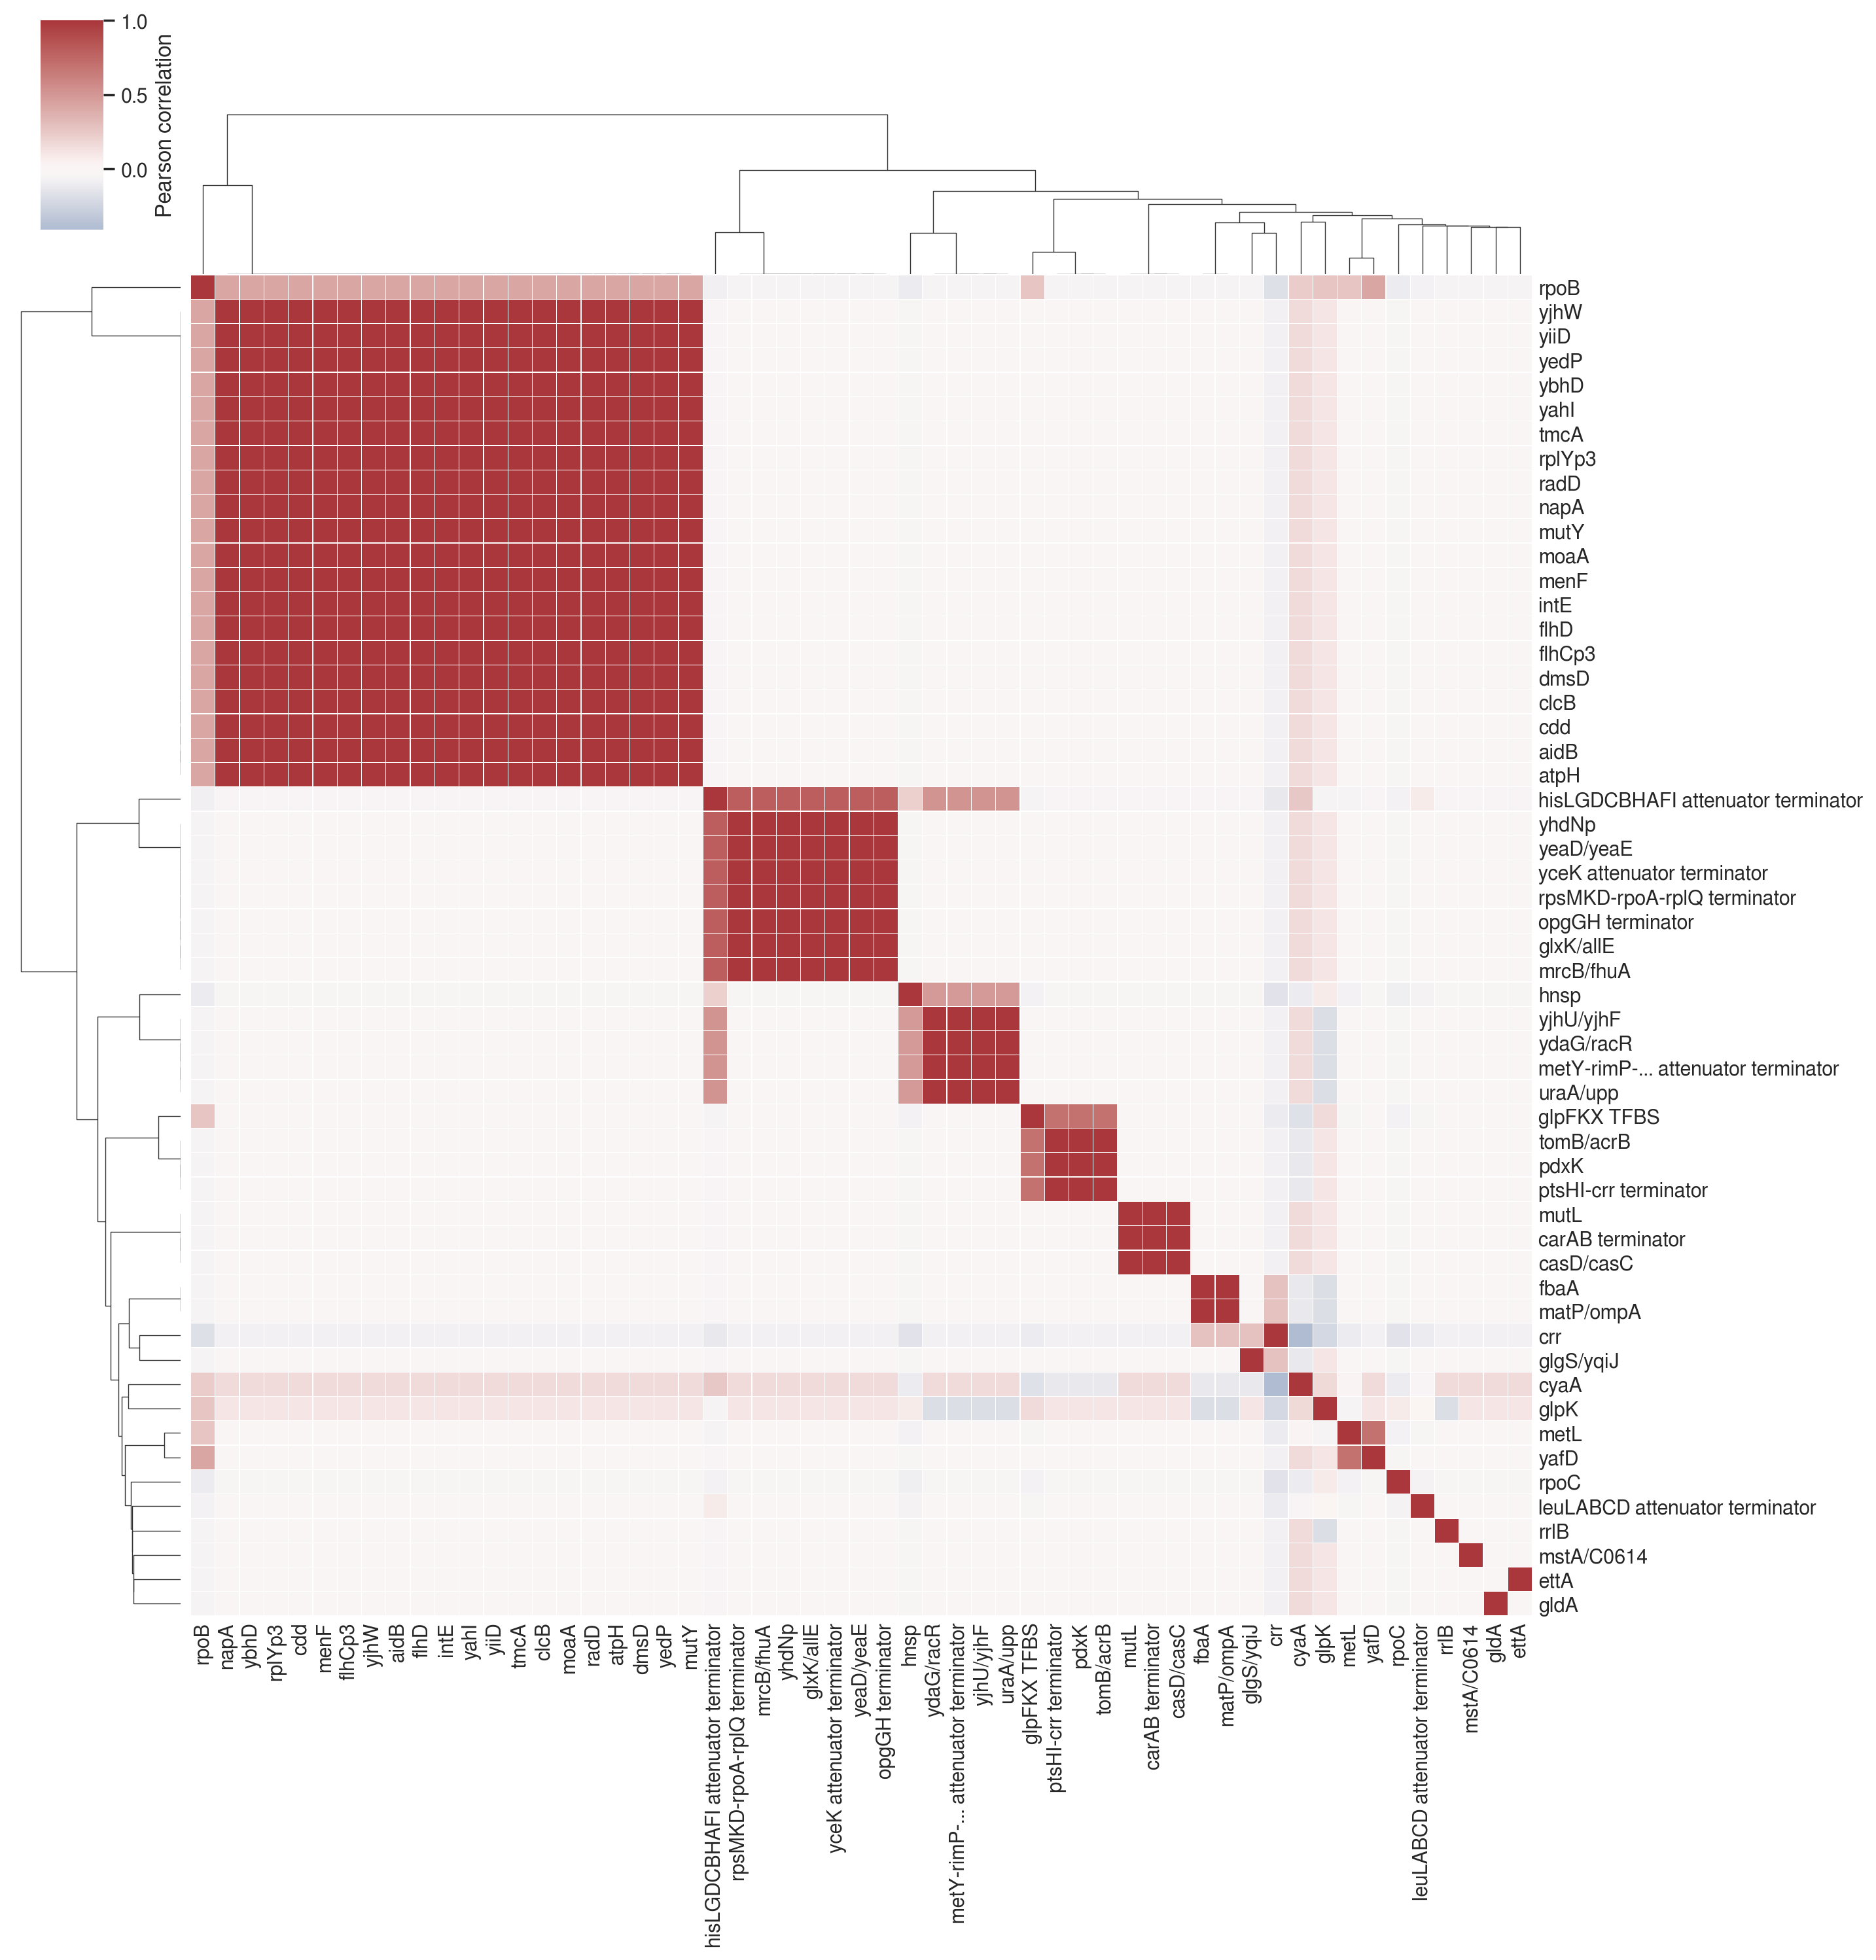

In [16]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.dpi"] = 200
plt.rcParams['font.sans-serif'] = ["FreeSans"]
sns.set_context("paper")
sns.set_style("white")
sns.set(font="FreeSans")


cm = sns.clustermap(
    corr_df,
    linewidths=0.1,
#     xticklabels=False,
#     yticklabels=False,
    figsize=(16,16),
    center=0,
    cmap="vlag",
    cbar_pos=(0.1, 0.85, 0.03, 0.10),
    cbar_kws={'label': 'Pearson correlation'}
)
# Fix for recent matplotlib/seaborn issue
cm.ax_heatmap.set_ylim(len(corr_df.T)+0, -0)

cm.ax_heatmap.tick_params(axis='both', which='both', length=0)
# cm.ax_heatmap.set_title("Pearson\ncorrelation")
# cm.fig.suptitle('Correlations between mutated genomic features\nassociated with glycerol as a carbon source', y=0.95) 
# cm.fig.suptitle('Mutations to pykF and rpoB are positively correlated\nwhile both negatively correlated with rpoC', y=1.05) 
# cm.cax.set_visible(False)
ax = cm.ax_heatmap
ax.set_ylabel("")
ax.set_xlabel("")

# H = 1
# W = 1
y0_offset = 0
hm = cm.ax_heatmap.get_position()
# plt.setp(cm.ax_heatmap.yaxis.get_majorticklabels(),fontsize=6)
# plt.setp(cm.ax_heatmap.xaxis.get_majorticklabels(),fontsize=6)
col_dendo = cm.ax_col_dendrogram.get_position()
cm.ax_col_dendrogram.set_position([
    col_dendo.x0,
    col_dendo.y0,
    col_dendo.width,
    col_dendo.height*0.5
])
row_dendo = cm.ax_row_dendrogram.get_position()
cm.ax_row_dendrogram.set_position([
    row_dendo.x0 + 0.0755,
    row_dendo.y0 + y0_offset,
    row_dendo.width*0.5,
    row_dendo.height
])
# cm.ax_heatmap.set_position([
#     hm.x0,
#     hm.y0 + y0_offset,
#     hm.width*W,
#     hm.height*H
# ])
